# Matrix Factorization

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Preprocessing

In [59]:
# Load the .dat file into a pandas dataframe
ratings_df = pd.read_table("ratings.dat", sep='::', header=None, names=['userId', 'movieId', 'rating', 'timestamp'])

In [25]:
ratings_df

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [65]:
# Load the .dat file into a pandas dataframe
movies_df = pd.read_table("movies.dat", sep='::', header=None, names=['movieId','Title','Genres'] , encoding = "ISO-8859-1")

C:\Users\OST\AppData\Local\Temp\ipykernel_10532\2621634529.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_df = pd.read_table("movies.dat", sep='::', header=None, names=['movieId','Title','Genres'],encoding = "ISO-8859-1")


In [66]:
movies_df 

,movieId,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [74]:
movies_ratings_df = pd.merge(ratings_df, movies_df, on='movieId').drop(['timestamp'] , axis = 1 )

In [128]:
movies_ratings_df

,userId,movieId,rating,Title,Genres
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...
1000204,5949,2198,5,Modulations (1998),Documentary
1000205,5675,2703,3,Broken Vessels (1998),Drama
1000206,5780,2845,1,White Boys (1999),Drama
1000207,5851,3607,5,One Little Indian (1973),Comedy|Drama|Western


Utility matrix

In [76]:
# Create a pivot table that represents the utility matrix
utility_matrix = ratings_df.pivot_table(index='userId', columns='movieId', values='rating')

# Fill any missing values with 0
utility_matrix.fillna(0, inplace=True)

# Convert the utility matrix to a NumPy array
utility_matrix = np.array(utility_matrix)

In [77]:
pd.DataFrame(utility_matrix)

,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Q3

In this section we don't have the regularization term,so beta is 0

In [131]:
sse =[]
def matrix_factorization(R,K,steps,alpha,beta):
    """
    R: user-item interaction matrix
    K: number of latent factors
    steps: number of iterations to perform
    alpha: learning rate
    beta: regularization parameter
    """
    N, M = R.shape
    P = np.random.rand(N, K)
    Q = np.random.rand(M, K)
    
    for step in tqdm(range(steps)):
        for i in range(N):
            for j in range(M):
                if R[i, j] > 0:
                    eij = R[i, j] - np.dot(P[i, :], Q[j, :].T)
                    for k in range(K):
                        P[i, k] = P[i, k] + alpha * (2 * eij * Q[j, k] - beta * P[i, k])
                        Q[j, k] = Q[j, k] + alpha * (2 * eij * P[i, k] - beta * Q[j, k])
                       
        e = 0
        for i in range(N):
            for j in range(M):
                if R[i, j] > 0:
                    e = e + pow(R[i, j] - np.dot(P[i, :], Q[j, :].T), 2)
                    if beta >0:
                        for k in range(K):
                            e = e + (beta / 2) * (pow(P[i, k], 2) + pow(Q[j, k], 2))
        
        sse.append(e)
        if e < 0.001:
            break
            
    return P, Q.T

In [80]:
np.array(utility_matrix)[0:10,0:15]

array([[5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [4., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0.],
       [5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [5., 5., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [133]:
P, Q = matrix_factorization(utility_matrix, K = 19  , steps=700, alpha=0.01, beta=0)

  2%|█▎                                                                             | 12/700 [06:22<6:00:56, 31.48s/it]C:\Users\OST\AppData\Local\Temp\ipykernel_10532\3393602047.py:21: RuntimeWarning: overflow encountered in double_scalars
  Q[j, k] = Q[j, k] + alpha * (2 * eij * P[i, k] - beta * Q[j, k])
C:\Users\OST\AppData\Local\Temp\ipykernel_10532\3393602047.py:20: RuntimeWarning: invalid value encountered in double_scalars
  P[i, k] = P[i, k] + alpha * (2 * eij * Q[j, k] - beta * P[i, k])
C:\Users\OST\AppData\Local\Temp\ipykernel_10532\3393602047.py:20: RuntimeWarning: overflow encountered in double_scalars
  P[i, k] = P[i, k] + alpha * (2 * eij * Q[j, k] - beta * P[i, k])
C:\Users\OST\AppData\Local\Temp\ipykernel_10532\3393602047.py:21: RuntimeWarning: invalid value encountered in double_scalars
  Q[j, k] = Q[j, k] + alpha * (2 * eij * P[i, k] - beta * Q[j, k])
  3%|██▌                                                                            | 23/700 [12:00<5:53:16, 31.31s/it]

KeyboardInterrupt: 

In [99]:
R_pred = np.dot(P, Q)
print(utility_matrix[0:10,0:15])
print('------------------------------------------')
print(np.array(R_pred.round(1)))

[[5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [4. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0.]
 [5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [5. 5. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0.]]
------------------------------------------
[[5.  4.9 1.9 3.6 0.4 4.3 4.  2.6 2.6 1.7 2.5 1.6 0.4 4.5 1.7]
 [1.9 1.7 0.7 1.4 0.3 1.4 1.7 1.  0.9 0.5 0.9 0.8 0.1 1.9 0.7]
 [2.2 2.2 0.9 1.6 0.2 1.9 1.8 1.2 1.2 0.7 1.1 0.7 0.2 2.1 0.8]
 [2.4 2.3 1.  1.8 0.3 1.9 2.1 1.3 1.3 0.7 1.2 0.9 0.2 2.4 0.9]
 [2.2 2.2 0.8 1.6 0.1 2.  1.6 1.1 1.2 0.8 1.1 0.6 0.2 1.9 0.7]
 [4.  3.8 1.6 2.9 0.5 3.1 3.4 2.1 2.  1.1 2.  1.4 0.3 3.8 1.4]
 [4.1 4.3 1.6 3.  0.2 4.  3.  2.2 2.3 1.7 2.1 1.  0.4 3.5 1.4]
 [4.1 3.9 1.6 3.  0.5 3.1 3.5 2.1 2

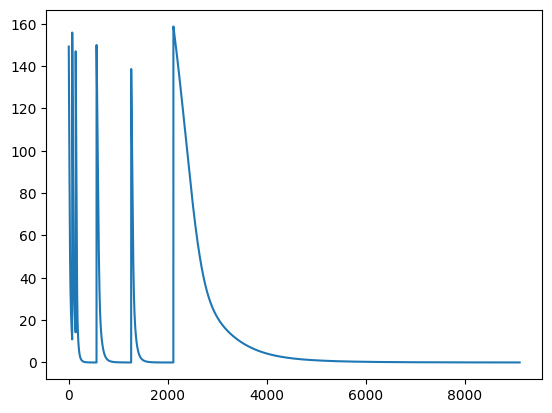

In [100]:
plt.plot(range(0,len(sse)),sse)

# Q4,Q5

we use the  $matrix-factorization(R,K,steps,alpha,beta)$ function that is implemented in the previous part,

but in this section we have regularization term,so beta isn't 0

The new formula for the updating the parameters is as follows:

$p'_{ik} = p_{ik} + \alpha \frac{\partial}{\partial p_{ik}}e_{ij}^2 = p_{ik} + \alpha(2 e_{ij} q_{kj} - \beta p_{ik} )$

$q'_{kj} = q_{kj} + \alpha \frac{\partial}{\partial q_{kj}}e_{ij}^2 = q_{kj} + \alpha(2 e_{ij} p_{ik} - \beta q_{kj} )$

In [101]:
P, Q = matrix_factorization(utility_matrix[0:10,0:15], K = 2  , steps=7000, alpha=0.0001, beta=0.01)

In [102]:
R_pred = np.dot(P, Q)
print(utility_matrix[0:10,0:15])
print('------------------------------------------')
print(np.array(R_pred.round(1)))

[[5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [4. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0.]
 [5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [5. 5. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0.]]
------------------------------------------
[[5.  4.9 2.4 3.5 1.2 4.7 3.9 1.1 1.6 0.9 2.9 0.8 1.2 4.6 1.6]
 [1.5 1.5 0.7 1.1 0.3 1.5 1.2 0.4 0.5 0.3 0.9 0.2 0.3 1.4 0.5]
 [2.8 2.8 1.4 2.  0.7 2.7 2.2 0.6 0.9 0.5 1.6 0.5 0.8 2.7 0.9]
 [0.3 0.3 0.1 0.2 0.1 0.2 0.2 0.  0.1 0.  0.1 0.1 0.1 0.3 0.1]
 [2.1 2.  0.9 1.4 0.4 2.  1.6 0.6 0.8 0.5 1.3 0.2 0.3 1.8 0.8]
 [4.  3.9 2.  2.9 1.1 3.8 3.2 0.8 1.2 0.6 2.2 0.7 1.2 3.8 1.2]
 [4.2 4.2 2.1 3.  1.2 4.  3.3 0.8 1.2 0.6 2.3 0.8 1.3 4.  1.3]
 [4.1 4.1 2.1 3.  1.2 3.9 3.2 0.8 1

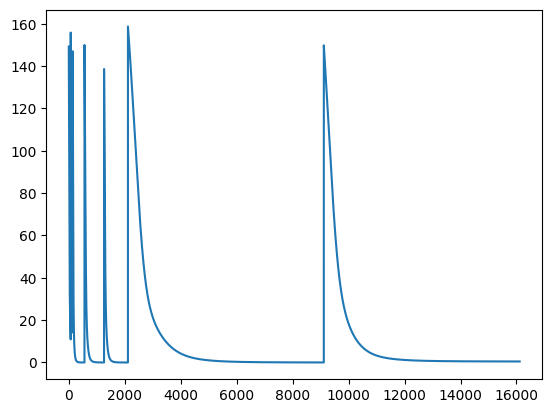

In [103]:
plt.plot(range(0,len(sse)),sse)

# Q6

# Q7

# Q8